# Logistic regression

The data is obtained from a case-control study assessing several plasma risk factors for breast cancer.<br>

The dataset contains following variables: <br>
**ID**&nbsp;&nbsp;&nbsp;&nbsp;Identification Code<br>
**matchid**&nbsp;&nbsp;&nbsp;&nbsp;Matched ID<br>
**case**&nbsp;&nbsp;&nbsp;&nbsp;Case (1) / Control (0)<br>
**curpmh**&nbsp;&nbsp;&nbsp;&nbsp;Current PMH use – yes(1) / no(0)<br>
**ageblood**&nbsp;&nbsp;&nbsp;&nbsp;Age at blood drawn<br>
**estradol**&nbsp;&nbsp;&nbsp;&nbsp;Estradiol concentration<br>
**estrone**&nbsp;&nbsp;&nbsp;&nbsp;Estrone concentration (missing value: 999)<br>
**testost**&nbsp;&nbsp;&nbsp;&nbsp;Testosterone concentration (missing value: 999)<br>
**prolactn**&nbsp;&nbsp;&nbsp;&nbsp;Prolactine concentration (missing value: 99.99)<br>

**Task**<br>
Perform simple logistic regression to assess the association between testosterone and breast cancer risk.
- Calculate and interpret the Odds Ratio.
- Calculate the “deviance” of the model and interpret.
- Create the ROC curve, the AUC and interpret.

Use testosterone level and age as predictors of breast cancer. Is this multiple logistic regression model better than the simple one?

In [1]:
blood_test <- read.table(file="/mnt/c/Users/Nnamdi/Desktop/Bioinformatics/Univariate_data_modelling/Exercises/DATASETS/BLOOD.txt", header  = T, sep=",")

In [2]:
head(blood_test)

,ID,matchid,case,curpmh,age,estradol,estrone,testost,prolactn
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,100013,164594,0,1,46,57,65,25,11.12
2,100241,107261,0,0,65,11,26,999,2.80
3,100696,110294,0,1,66,3,999,8,38.00
4,101266,101266,1,0,57,4,18,6,8.90
5,101600,101600,1,0,66,6,18,25,6.90
6,102228,155717,0,1,57,10,999,31,13.94


### Expolratory data analysis

In [3]:
summary(blood_test)

       ID            matchid            case            curpmh     
 Min.   :100013   Min.   :100738   Min.   :0.0000   Min.   :0.000  
 1st Qu.:149394   1st Qu.:146363   1st Qu.:0.0000   1st Qu.:0.000  
 Median :211040   Median :210114   Median :0.0000   Median :0.000  
 Mean   :220313   Mean   :219132   Mean   :0.3216   Mean   :0.151  
 3rd Qu.:288886   3rd Qu.:287737   3rd Qu.:1.0000   3rd Qu.:0.000  
 Max.   :368046   Max.   :368046   Max.   :1.0000   Max.   :1.000  
      age           estradol         estrone         testost     
 Min.   :45.00   Min.   : 2.000   Min.   : 10.0   Min.   :  4.0  
 1st Qu.:57.00   1st Qu.: 5.000   1st Qu.: 21.0   1st Qu.: 17.0  
 Median :62.00   Median : 7.000   Median : 31.0   Median : 24.0  
 Mean   :60.97   Mean   : 8.908   Mean   :246.2   Mean   : 48.7  
 3rd Qu.:65.00   3rd Qu.:10.750   3rd Qu.: 61.5   3rd Qu.: 32.0  
 Max.   :69.00   Max.   :85.000   Max.   :999.0   Max.   :999.0  
    prolactn     
 Min.   : 1.960  
 1st Qu.: 6.728  
 Median 

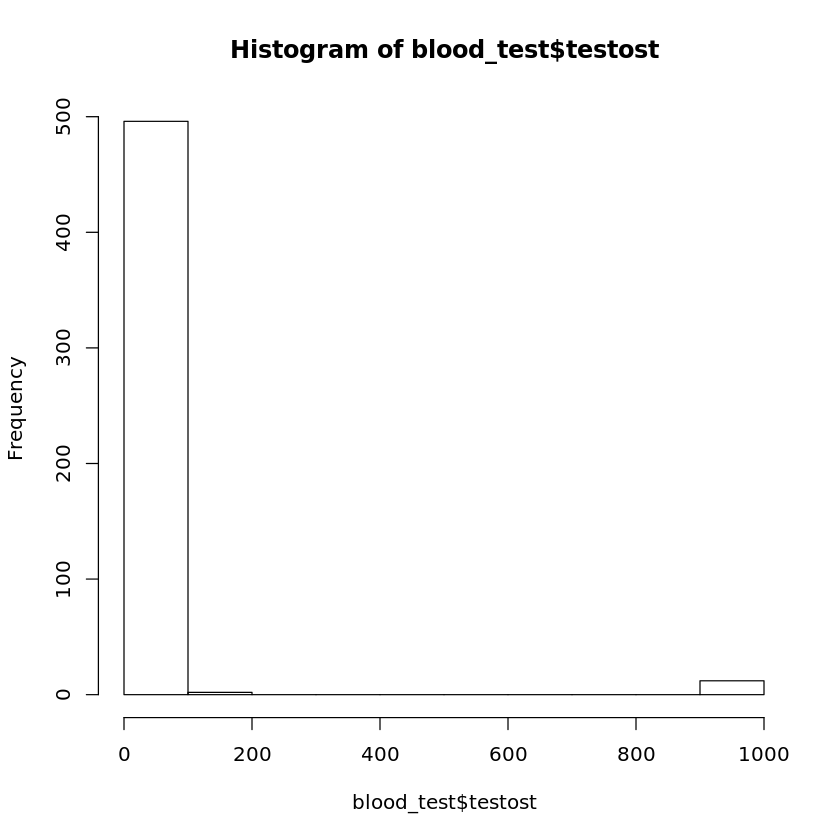

In [4]:
hist(blood_test$testost)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    4.0    17.0    23.0    25.8    31.0   144.0 

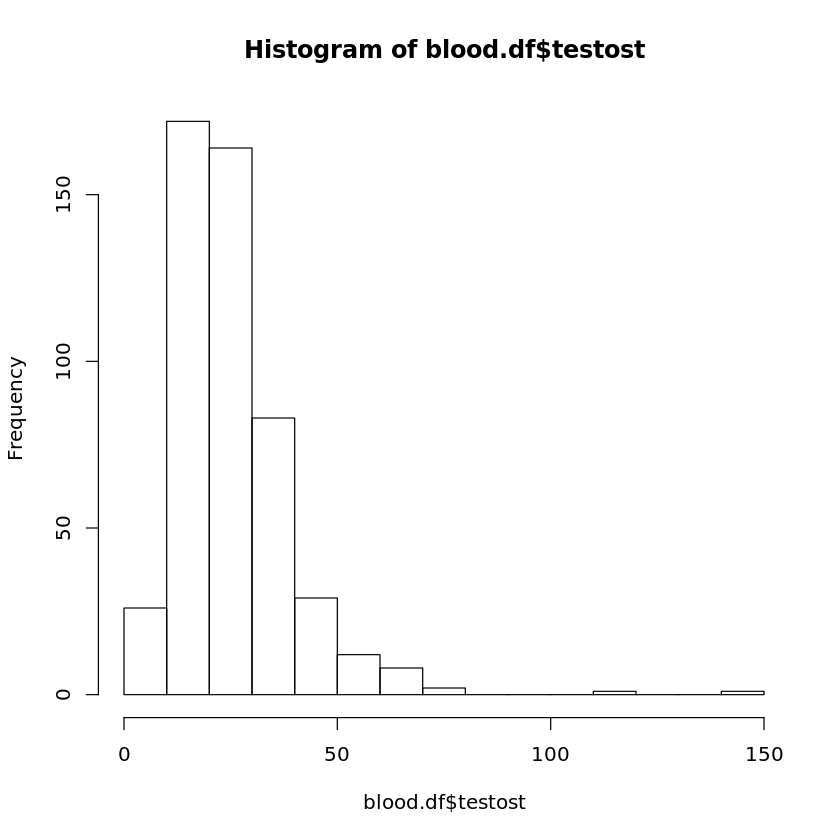

In [5]:
# remove the missing data
blood.df <- subset(blood_test, blood_test$testost!='999',)
summary(blood.df$testost)
hist(blood.df$testost)

### Simple logistic regression

In [6]:
blood.glm <- glm(case ~ testost, family = binomial(link=logit), data=blood.df)

In [7]:
summary(blood.glm)


Call:
glm(formula = case ~ testost, family = binomial(link = logit), 
    data = blood.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3647  -0.8744  -0.8297   1.4628   1.6334  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.111712   0.203544  -5.462 4.71e-08 ***
testost      0.013891   0.006769   2.052   0.0402 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 625.32  on 497  degrees of freedom
Residual deviance: 621.05  on 496  degrees of freedom
AIC: 625.05

Number of Fisher Scoring iterations: 4


### Odds ratio

In [8]:
exp(0.013891)

[1] 1.013988

The odds ratio is given as 1.0139879282305

This implies that the odds of having breast cancer increase by 1.398% for each one unit increase in testosterone level

### Model diagnostics - Deviance of the model

In [9]:
# blood.glm$deviance
# blood.glm$null.deviance
dev <- (blood.glm$null.deviance - blood.glm$deviance)/blood.glm$null.deviance
dev

[1] 0.006831681

This value represents the proportion of deviance explained by this model. The model is a bad model since this value is very low.

### ROC curve 

In [10]:
library("ROCR")
predict <- fitted(blood.glm)
pred <- prediction(predict, blood.df$case)
perf <- performance(pred, measure = "tpr", x.measure = "fpr")
plot(perf, main="sensitivity vs false positive rate",colorize=TRUE)
perf_auc <- performance(pred, measure = "auc")
perf_auc

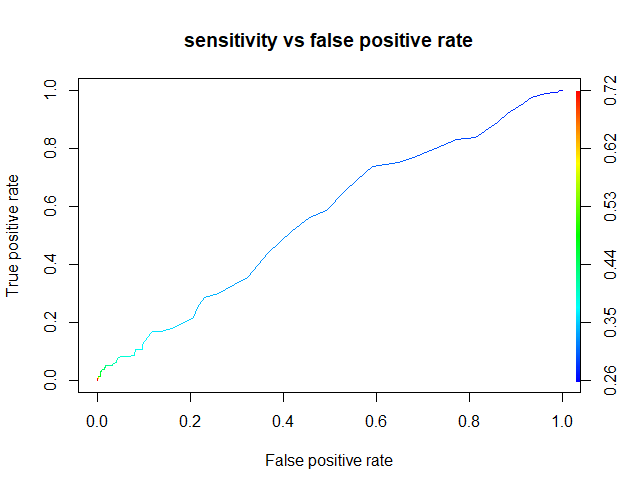

### Interpretation
The area under the curve for the model is small which confirms that the model is not good at classication

### Multiple logistic regression

In [12]:
blood.glm2 <- glm(case ~ testost +age, family = binomial(link=logit), data=blood.df)
summary(blood.glm2)


Call:
glm(formula = case ~ testost + age, family = binomial(link = logit), 
    data = blood.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3557  -0.8778  -0.8310   1.4545   1.6224  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.650054   1.179175  -0.551   0.5814  
testost      0.014199   0.006814   2.084   0.0372 *
age         -0.007703   0.019394  -0.397   0.6912  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 625.32  on 497  degrees of freedom
Residual deviance: 620.89  on 495  degrees of freedom
AIC: 626.89

Number of Fisher Scoring iterations: 4


### Odds ratio

In [13]:
exp(blood.glm2$coefficients)

(Intercept)     testost         age 
  0.5220175   1.0143005   0.9923268

The odds ratio for testosterone is given as 1.0143 whereas the odds ratio for age is given as 0.9923.

This implies that odds of having breast cancer increase by 1.43% for each one unit increase in testosterone level when taking age into account. Conversely, the odds of having breast cancer decreases by 0.77% for each unit increas in age when taking testosterone level into account

### Model diagnostics - Deviance of the model

In [14]:
dev2 <- (blood.glm2$null.deviance - blood.glm2$deviance)/blood.glm2$null.deviance
dev2

[1] 0.007083455

Likewise, the value is low which indicates that the model is not good as it can only explain a small proportion of the deviance

### ROC curve 

In [15]:
predict <- fitted(blood.glm2)
pred <- prediction(predict, blood.df$case)
perf <- performance(pred, measure = "tpr", x.measure = "fpr")
plot(perf, main="sensitivity vs false positive rate", colorize=TRUE)

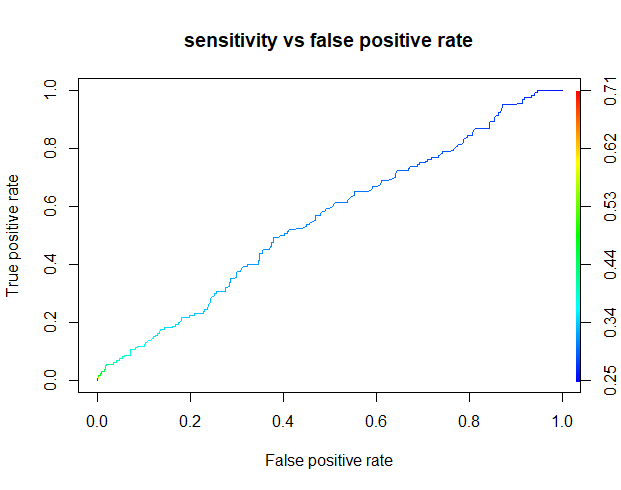

The low AUC indicates that the model from the multiple logistic regression is not good

### Comparison of model 1 and model 2

In [20]:
diff.dev <- blood.glm$deviance - blood.glm2$deviance

#### Hypothesis
Null hypothesis : model 1 is equal to  model 2 <br>
Alternative hypothesis: model 1 not equal to model 2

In [21]:
1-pchisq(diff.dev,1)

[1] 0.6915241

We do not reject the null hypothesis since the p-value is greater than 0.05. Therefore, model 2 is not better than model 1 in predicting the odds of having breast cancer 